Install Pycaret

In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 7.9 MB/s et

Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


Dataset

In [4]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/vishnudevarapu/6220_Final_Project/main/University_Admission.csv')
df.head(25)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0         337          118                  4  4.5   4.5  9.65   
1         324          107                  4  4.0   4.5  8.87   
2         316          104                  3  3.0   3.5  8.00   
3         322          110                  3  3.5   2.5  8.67   
4         314          103                  2  2.0   3.0  8.21   
5         330          115                  5  4.5   3.0  9.34   
6         321          109                  3  3.0   4.0  8.20   
7         308          101                  2  3.0   4.0  7.90   
8         302          102                  1  2.0   1.5  8.00   
9         323          108                  3  3.5   3.0  8.60   
10        325          106                  3  3.5   4.0  8.40   
11        327          111                  4  4.0   4.5  9.00   
12        328          112                  4  4.0   4.5  9.10   
13        307          109                  3  4.0   3.0  8.00   
14        311          104                  3  3.5   2.0  8.20   
15        314          105                  3  3.5   2.5  8.30   
16        317          107                  3  4.0   3.0  8.70   
17        319          106                  3  4.0   3.0  8.00   
18        318          110                  3  4.0   3.0  8.80   
19        303          102                  3  3.5   3.0  8.50   
20        312          107                  3  3.0   2.0  7.90   
21        325          114                  4  3.0   2.0  8.40   
22        328          116                  5  5.0   5.0  9.50   
23        334          119                  5  5.0   4.5  9.70   
24        336          119                  5  4.0   3.5  9.80   

    Chance of Admit   Class  
0               0.92      1  
1               0.76      1  
2               0.72      1  
3               0.80      1  
4               0.65      0  
5               0.90      1  
6               0.75      1  
7               0.68      0  
8               0.50      0  
9               0.45      0  
10              0.52      1  
11              0.84      1  
12              0.78      1  
13              0.62      1  
14              0.61      1  
15              0.54      0  
16              0.66      0  
17              0.65      1  
18              0.63      0  
19              0.62      0  
20              0.64      1  
21              0.70      0  
22              0.94      1  
23              0.95      1  
24              0.97      1

In [5]:
len(df.index)

299

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          299 non-null    int64  
 1   TOEFL Score        299 non-null    int64  
 2   University Rating  299 non-null    int64  
 3   SOP                299 non-null    float64
 4   LOR                299 non-null    float64
 5   CGPA               299 non-null    float64
 6   Chance of Admit    299 non-null    float64
 7   Class              299 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 18.8 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


Exploratory Data Analysis

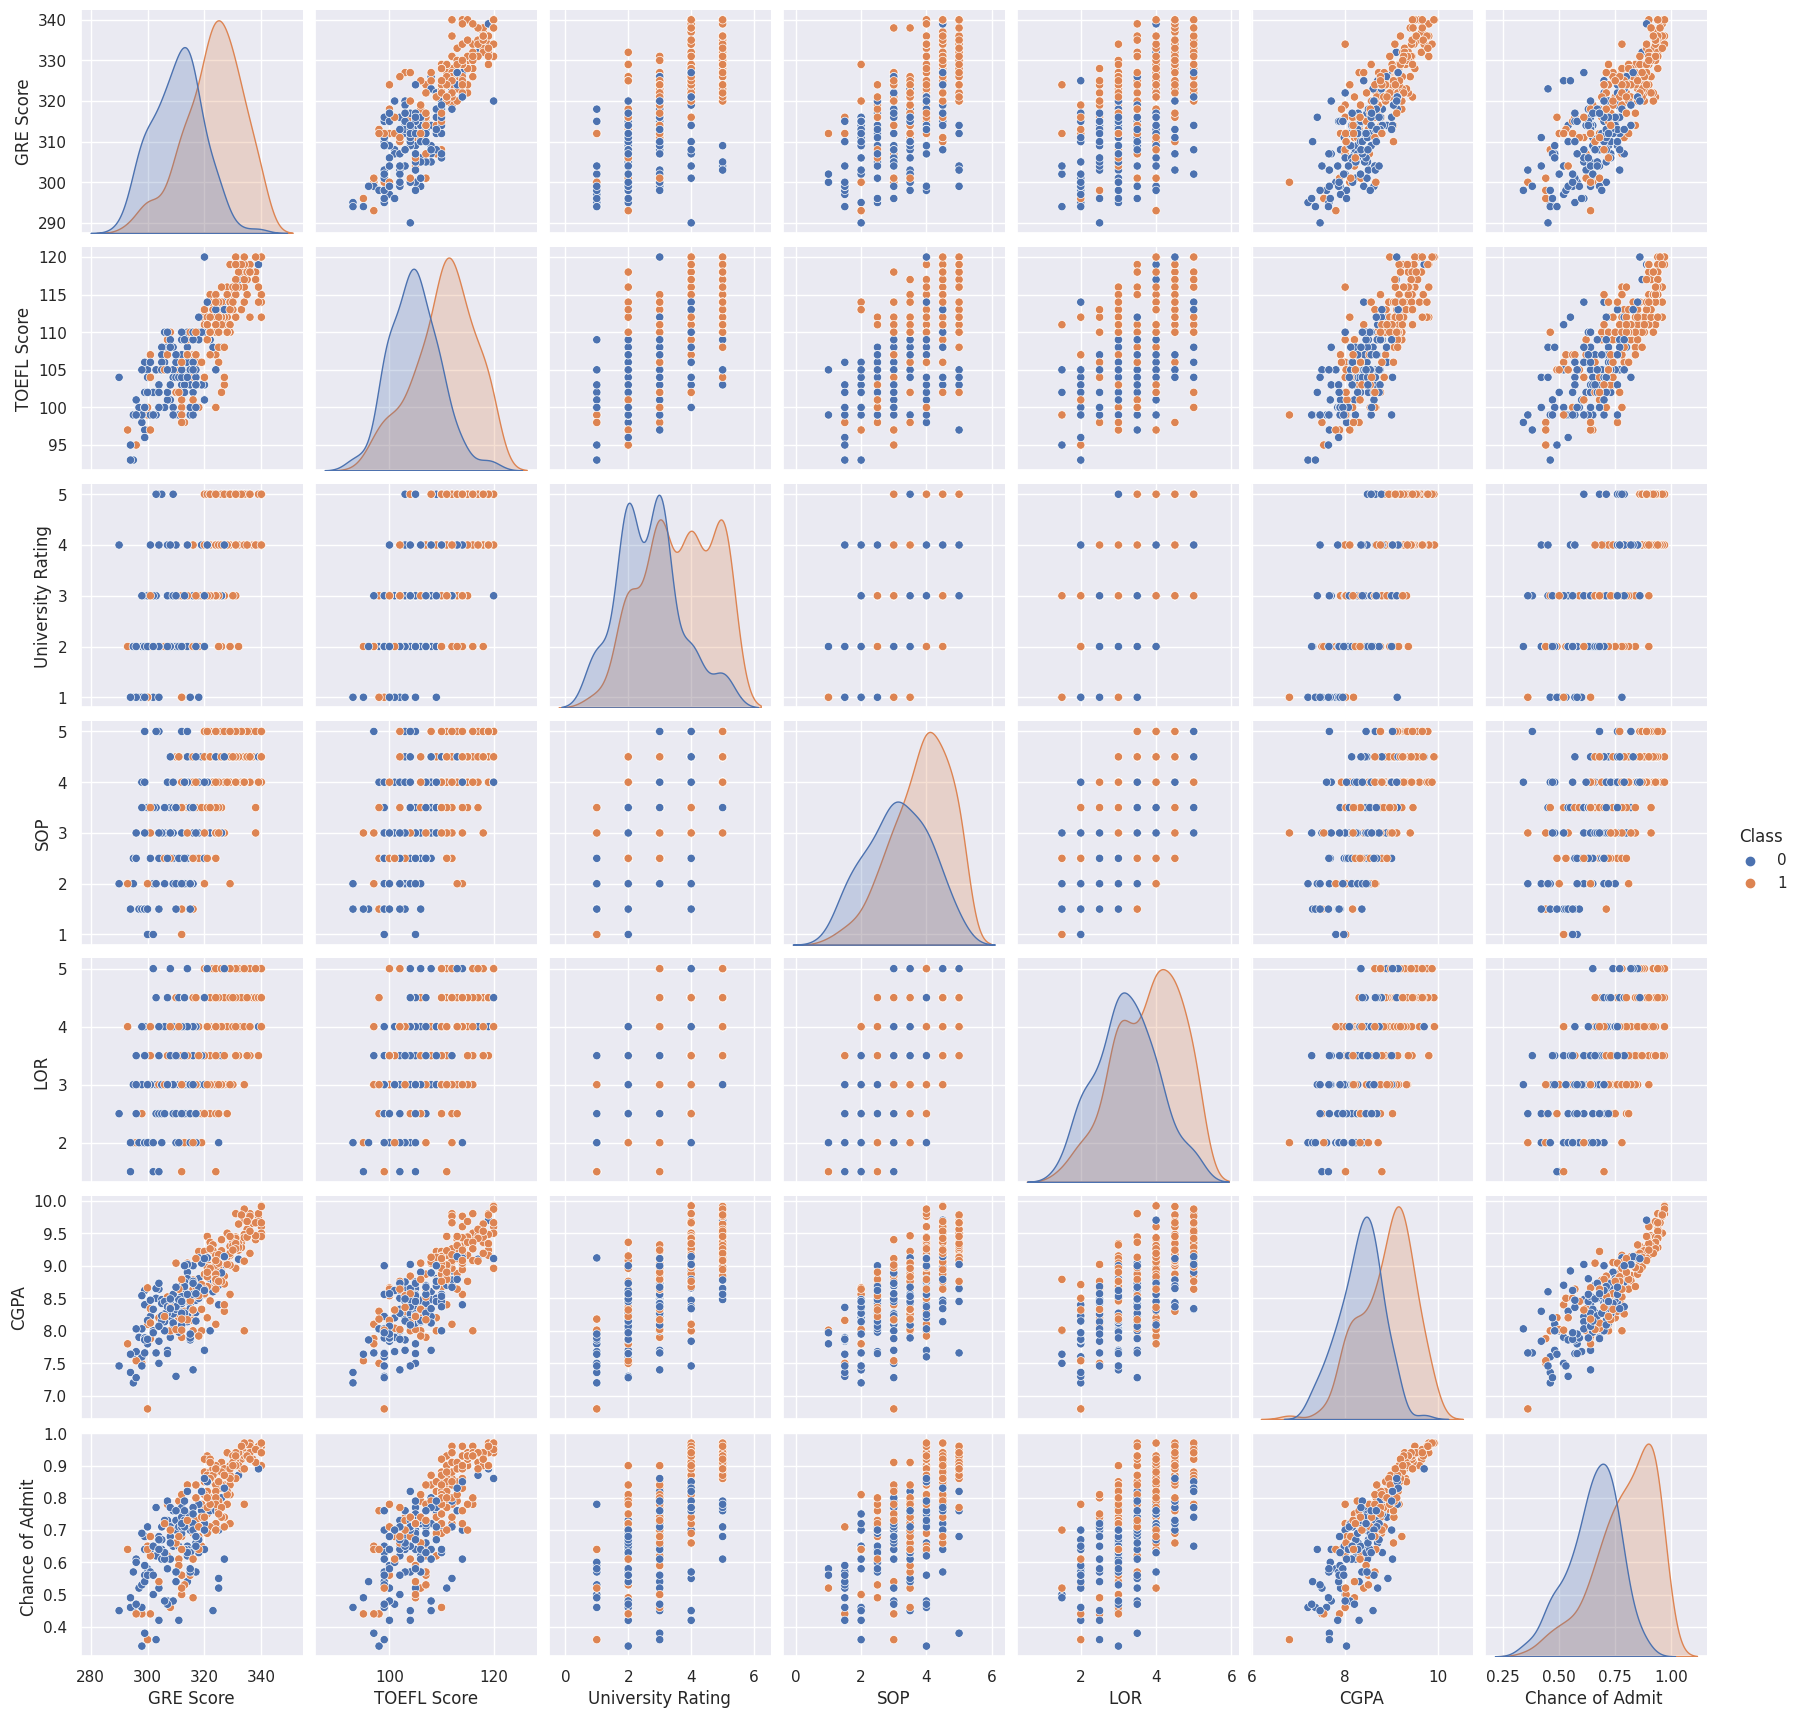

In [9]:
sns.pairplot(df, hue='Class')
plt.show()

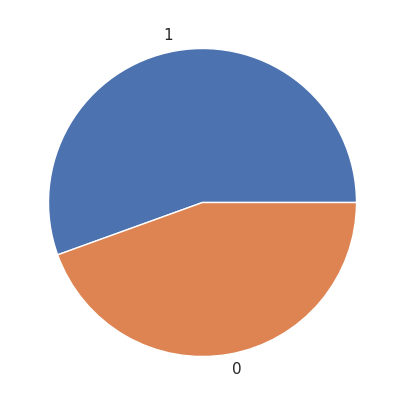

In [10]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [11]:
X = df.drop(columns=['Class'])
X.head(10)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0        337          118                  4  4.5   4.5  9.65   
1        324          107                  4  4.0   4.5  8.87   
2        316          104                  3  3.0   3.5  8.00   
3        322          110                  3  3.5   2.5  8.67   
4        314          103                  2  2.0   3.0  8.21   
5        330          115                  5  4.5   3.0  9.34   
6        321          109                  3  3.0   4.0  8.20   
7        308          101                  2  3.0   4.0  7.90   
8        302          102                  1  2.0   1.5  8.00   
9        323          108                  3  3.5   3.0  8.60   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  
5              0.90  
6              0.75  
7              0.68  
8              0.50  
9              0.45

In [12]:
X.describe().transpose()

count        mean        std     min     25%     50%  \
GRE Score          299.0  317.478261  11.433292  290.00  310.00  317.00   
TOEFL Score        299.0  107.956522   6.093906   93.00  104.00  108.00   
University Rating  299.0    3.193980   1.165426    1.00    2.00    3.00   
SOP                299.0    3.513378   0.992330    1.00    3.00    3.50   
LOR                299.0    3.540134   0.890891    1.50    3.00    3.50   
CGPA               299.0    8.645920   0.593317    6.80    8.22    8.65   
Chance of Admit    299.0    0.731237   0.143717    0.34    0.64    0.73   

                      75%     max  
GRE Score          326.00  340.00  
TOEFL Score        112.00  120.00  
University Rating    4.00    5.00  
SOP                  4.50    5.00  
LOR                  4.00    5.00  
CGPA                 9.10    9.92  
Chance of Admit      0.85    0.97

Standardize the Data

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.710309     1.650881           0.692769  0.995914  1.079230  1.695153   
1   0.571373    -0.157227           0.692769  0.491205  1.079230  0.378307   
2  -0.129511    -0.650347          -0.166724 -0.518213 -0.045125 -1.090483   
3   0.396152     0.335894          -0.166724 -0.013504 -1.169479  0.040654   
4  -0.304732    -0.814721          -1.026218 -1.527631 -0.607302 -0.735948   
5   1.097036     1.157761           1.552263  0.995914 -0.607302  1.171791   
6   0.308541     0.171520          -0.166724 -0.518213  0.517053 -0.752830   
7  -0.830395    -1.143468          -1.026218 -0.518213  0.517053 -1.259309   
8  -1.356058    -0.979094          -1.885712 -1.527631 -2.293833 -1.090483   
9   0.483762     0.007147          -0.166724 -0.013504 -0.607302 -0.077525   

   Chance of Admit   
0          1.315636  
1          0.200469  
2         -0.078323  
3          0.479261  
4         -0.566209  
5          1.176241  
6          0.130771  
7         -0.357115  
8         -1.611678  
9         -1.960168

In [14]:
X.describe().transpose()

count          mean       std       min       25%  \
GRE Score          299.0  2.394220e-15  1.001676 -2.407384 -0.655174   
TOEFL Score        299.0 -3.980465e-16  1.001676 -2.458455 -0.650347   
University Rating  299.0  1.128789e-16  1.001676 -1.885712 -1.026218   
SOP                299.0 -5.940993e-18  1.001676 -2.537049 -0.518213   
LOR                299.0  8.911489e-18  1.001676 -2.293833 -0.607302   
CGPA               299.0 -8.614440e-16  1.001676 -3.116400 -0.719065   
Chance of Admit    299.0  2.732857e-16  1.001676 -2.726845 -0.635906   

                        50%       75%       max  
GRE Score         -0.041901  0.746594  1.973141  
TOEFL Score        0.007147  0.664641  1.979628  
University Rating -0.166724  0.692769  1.552263  
SOP               -0.013504  0.995914  1.500623  
LOR               -0.045125  0.517053  1.641407  
CGPA               0.006889  0.766607  2.150984  
Chance of Admit   -0.008625  0.827751  1.664126

Observations and variables

In [15]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

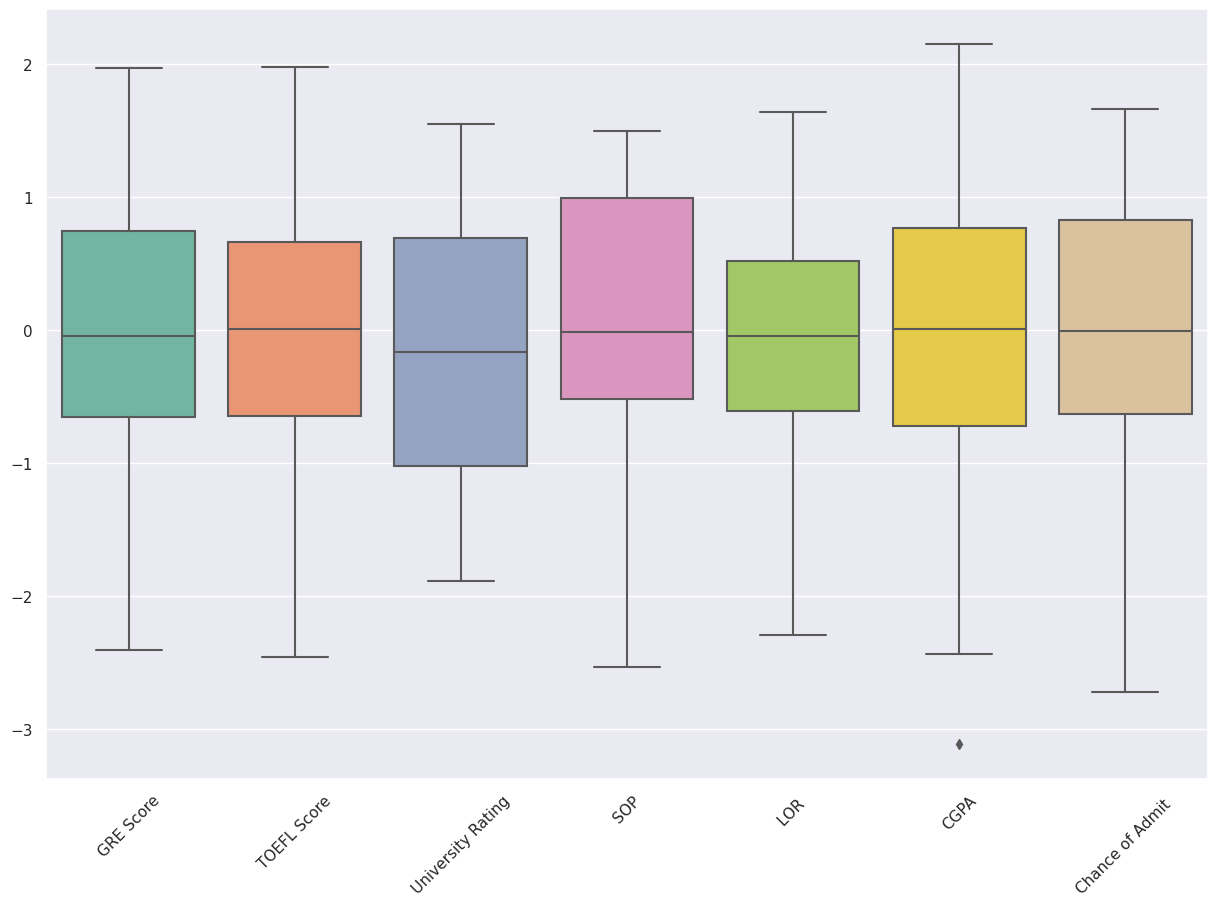

In [16]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


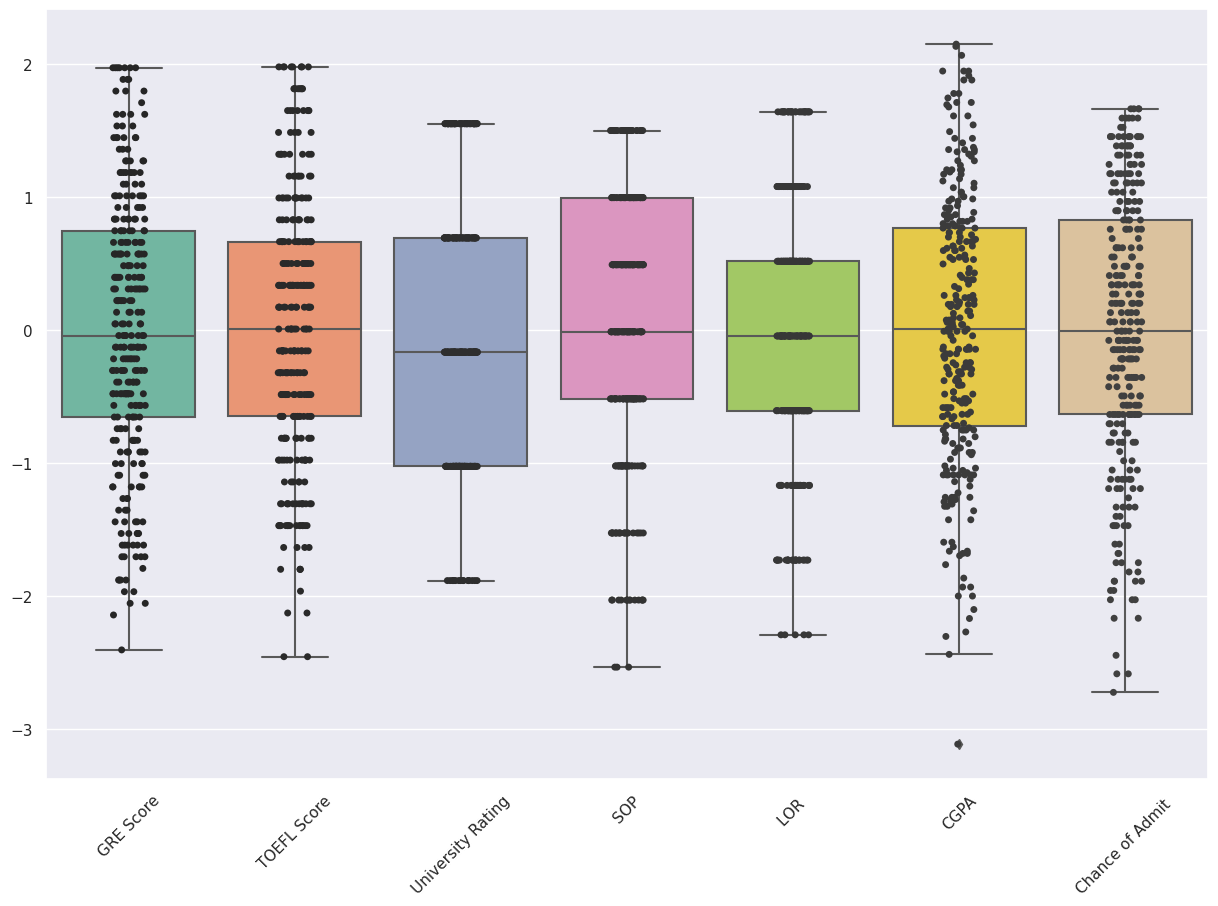

In [17]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

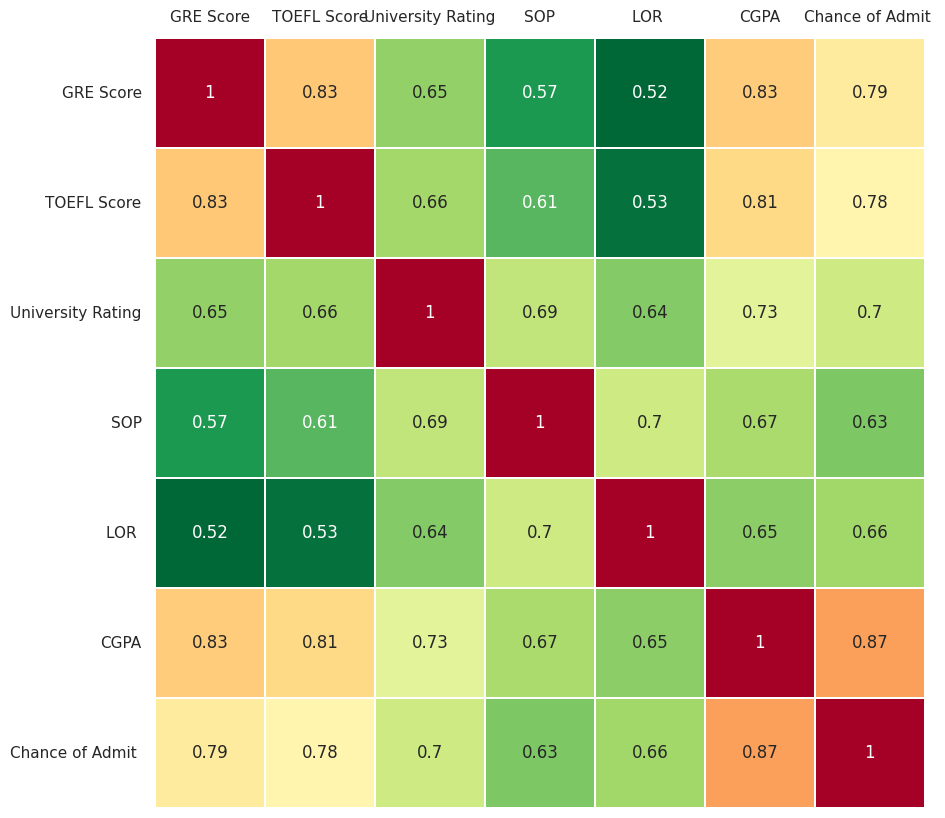

In [18]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Principal Component Analysis (PCA)

Text(0, 0.5, 'Z2')

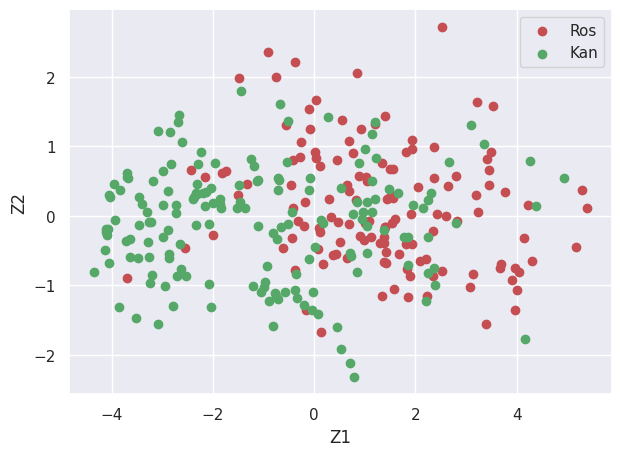

In [19]:
pca = PCA()
Z = pca.fit_transform(X)

idx_Ros = np.where(y == 0)
idx_Kan = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_Ros, 0], Z[idx_Ros, 1], c='r', label='Ros')
plt.scatter(Z[idx_Kan, 0], Z[idx_Kan, 1], c='g', label='Kan')

plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

Eigenvectors

array([[-0.38270634, -0.43033862, -0.02683188,  0.11195631,  0.25288624,
         0.75112827,  0.16415004],
       [-0.38483499, -0.37270245,  0.09397488,  0.26230671,  0.49794035,
        -0.62127161,  0.03789207],
       [-0.37080746,  0.19931532,  0.62816465, -0.64723203,  0.09146454,
         0.00696697,  0.02933933],
       [-0.35407455,  0.48500037,  0.35245799,  0.66483235, -0.24359914,
         0.07277889,  0.09241141],
       [-0.34035528,  0.58587593, -0.5914577 , -0.14253659,  0.40913582,
         0.03479052, -0.04654337],
       [-0.40856526, -0.18377958, -0.1288841 , -0.03593786, -0.36591292,
        -0.01368574, -0.80456031],
       [-0.39975447, -0.15467405, -0.32434238, -0.19010894, -0.56490111,
        -0.20756908,  0.55922689]])

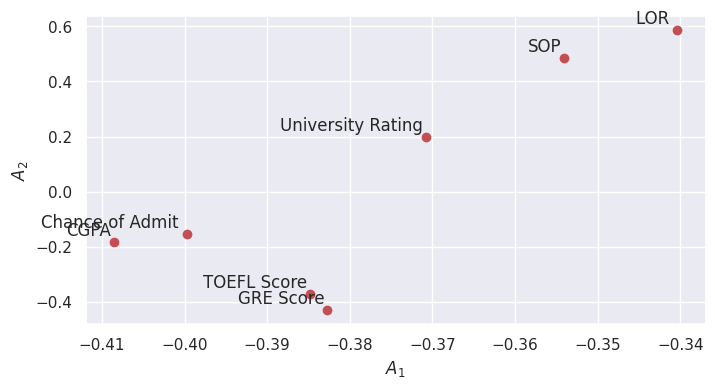

In [20]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


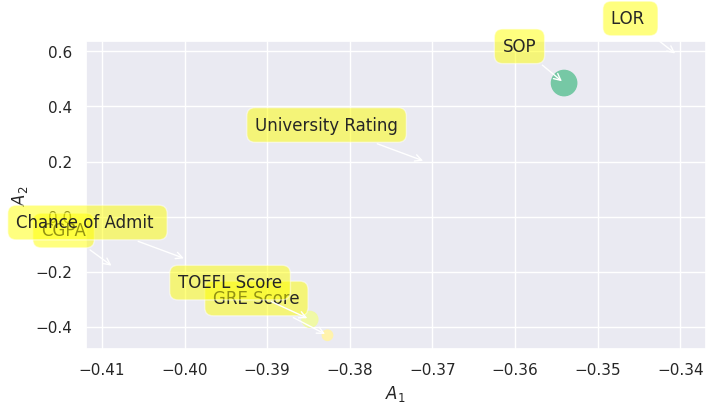

In [21]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree plot

array([5.18445307, 0.70295994, 0.34603911, 0.29653431, 0.20275877,
       0.16578976, 0.12495498])

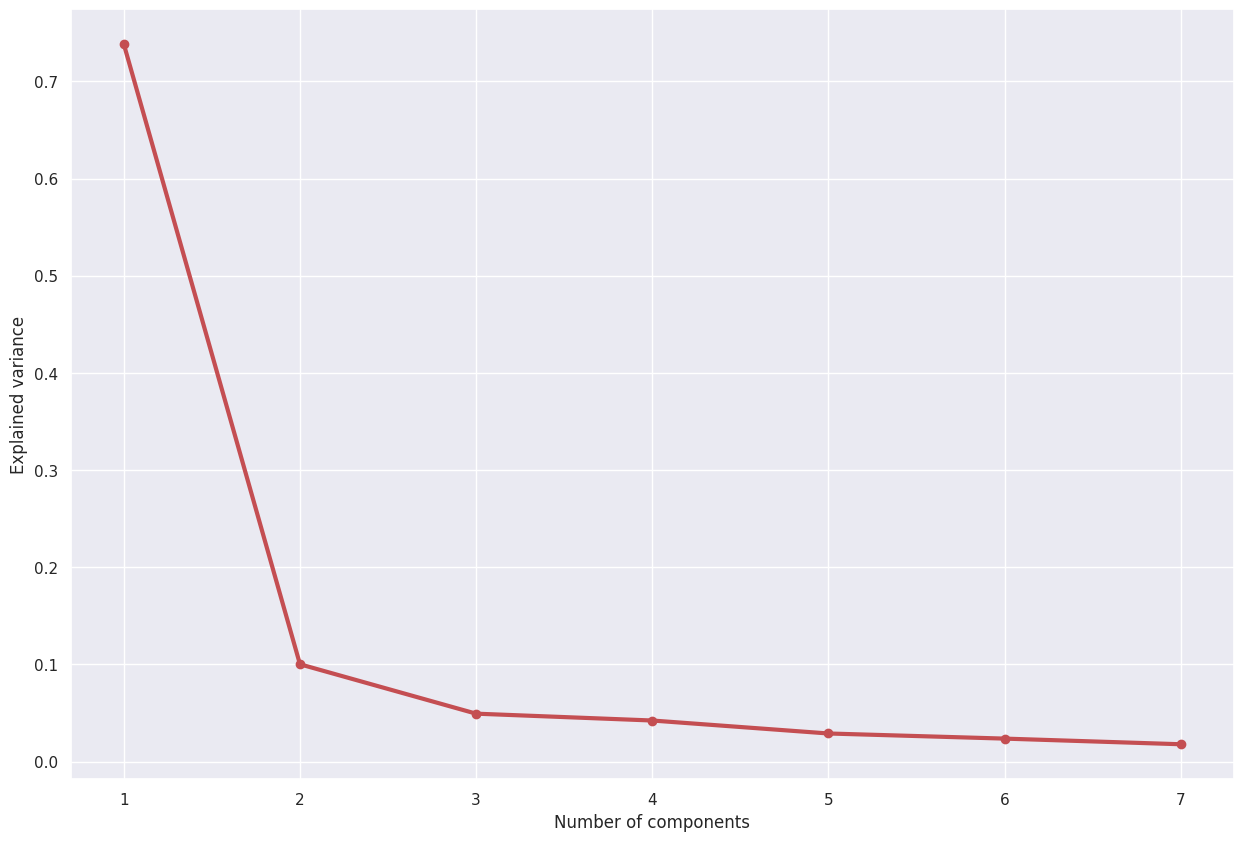

In [22]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

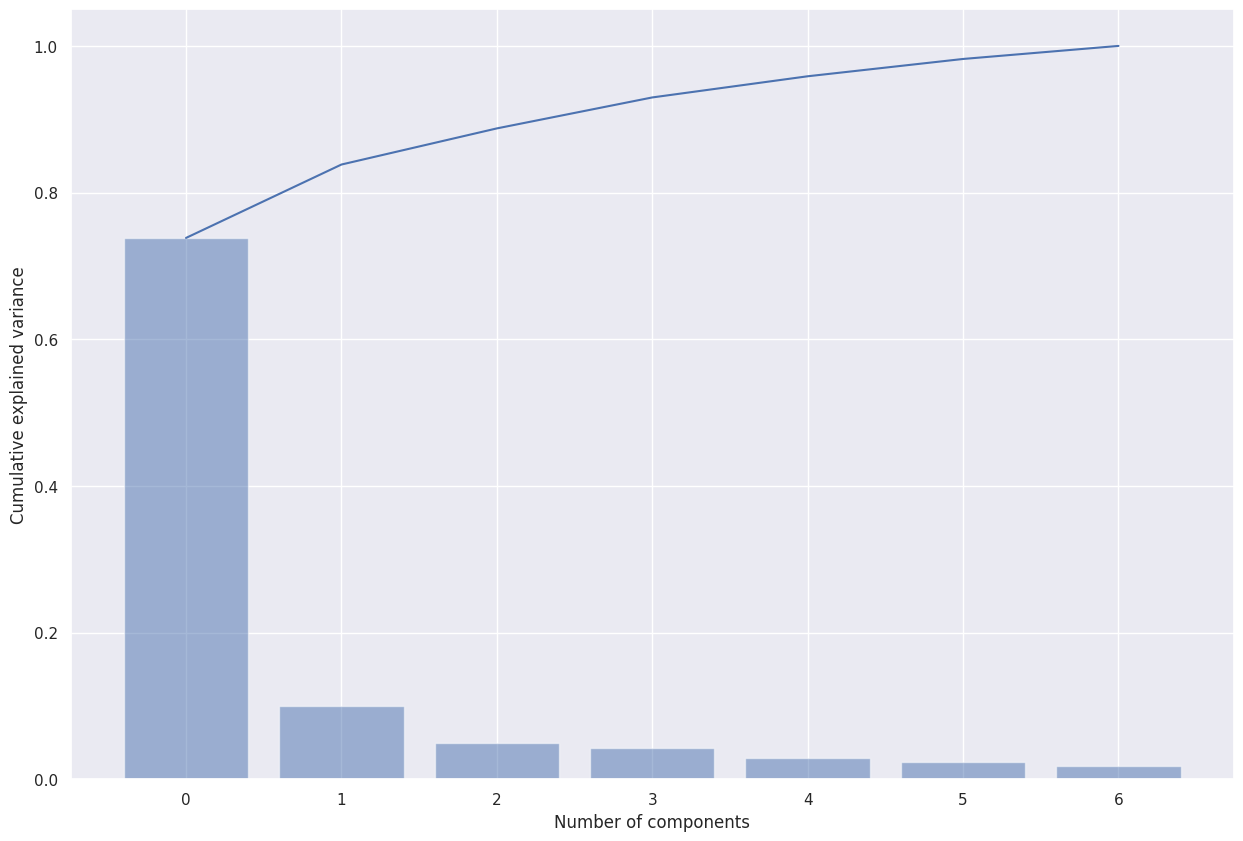

In [23]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Biplot

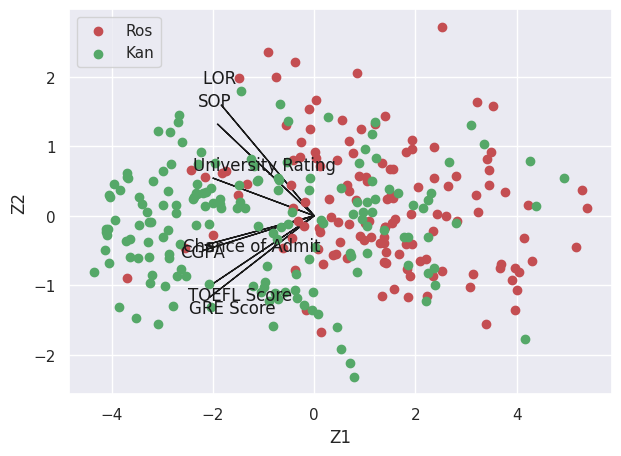

In [24]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Ros,0], Z[idx_Ros,1], c='r', label='Ros')
plt.scatter(Z[idx_Kan,0], Z[idx_Kan,1], c='g', label='Kan')
plt.legend(loc='upper left')

Using PCA Library

In [25]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.5 MB/s eta 0:00:00


In [26]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Principal Components

In [27]:
out['PC']

PC1       PC2       PC3       PC4       PC5
0   -3.485208 -0.612936 -0.388072  0.373387  0.153383
1   -1.190992  0.720791 -0.173901 -0.304622  0.199788
2    1.037352  0.199641 -0.152381 -0.361194  0.179206
3   -0.024428 -1.102218  0.442459  0.305511 -0.508610
4    2.085306 -0.643630 -0.613756 -0.378588  0.136198
..        ...       ...       ...       ...       ...
294  2.384310 -1.001465  0.260034  0.096931 -0.476611
295  1.676517 -0.556785 -0.125018  0.211120 -0.859290
296  0.296460  0.235849 -0.150257 -0.048801 -0.402517
297 -2.004670 -0.278390 -0.781873  0.625883  0.554593
298 -2.340243 -0.126510 -0.838884  0.739930 -0.075686

[299 rows x 5 columns]

Scatter plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [98.22%] of the variance'}, xlabel='PC1 (73.8% expl.var)', ylabel='PC2 (10.0% expl.var)'>)

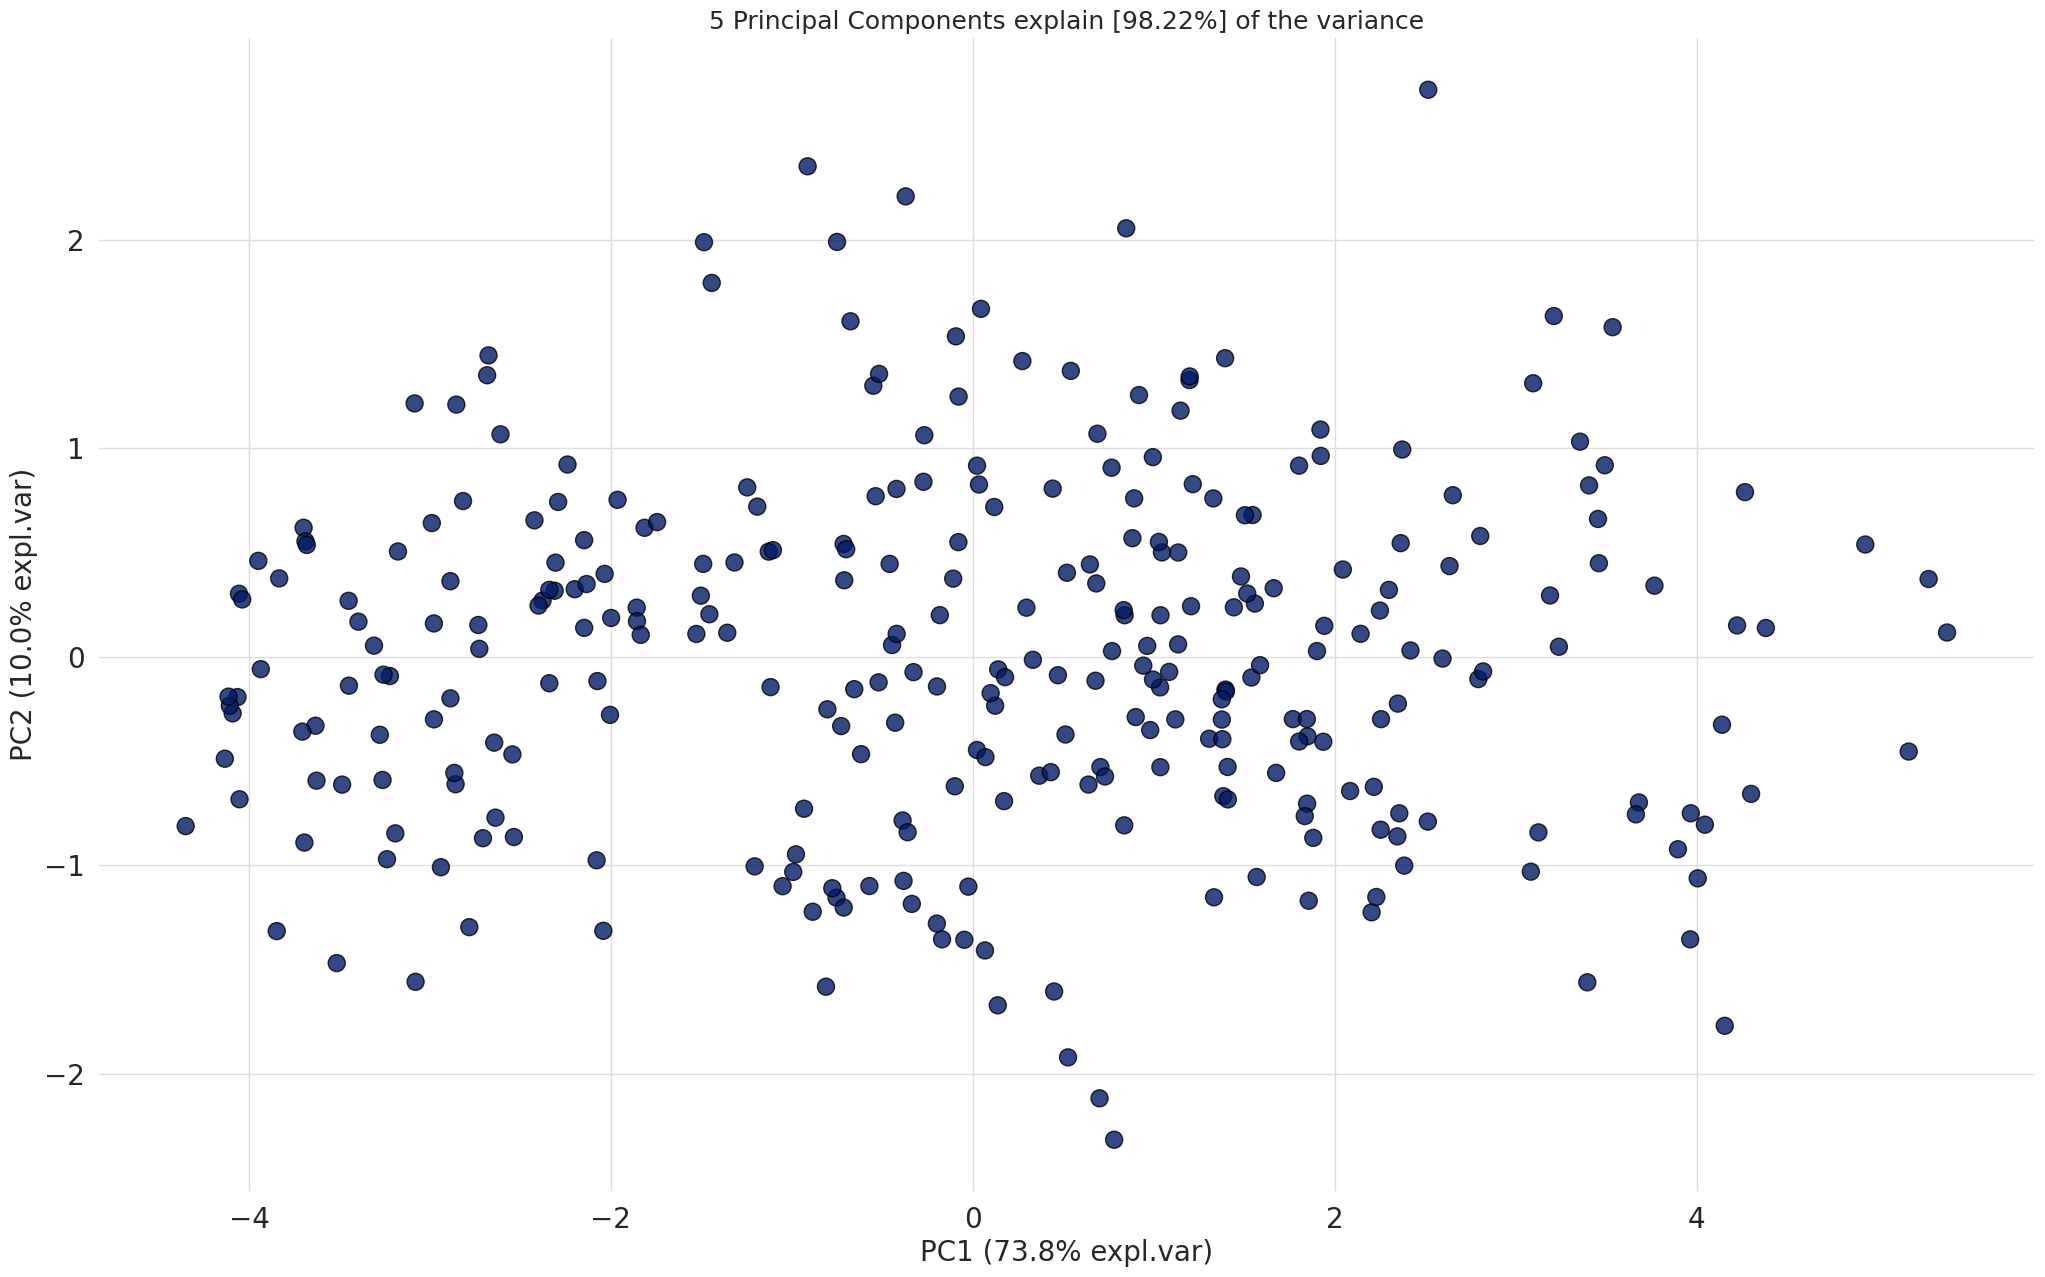

In [28]:
model.scatter(label=True, legend=False)

Eigenvectors

In [29]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5
GRE Score         -0.382706 -0.430339 -0.026832  0.111956  0.252886
TOEFL Score       -0.384835 -0.372702  0.093975  0.262307  0.497940
University Rating -0.370807  0.199315  0.628165 -0.647232  0.091465
SOP               -0.354075  0.485000  0.352458  0.664832 -0.243599
LOR               -0.340355  0.585876 -0.591458 -0.142537  0.409136
CGPA              -0.408565 -0.183780 -0.128884 -0.035938 -0.365913
Chance of Admit   -0.399754 -0.154674 -0.324342 -0.190109 -0.564901

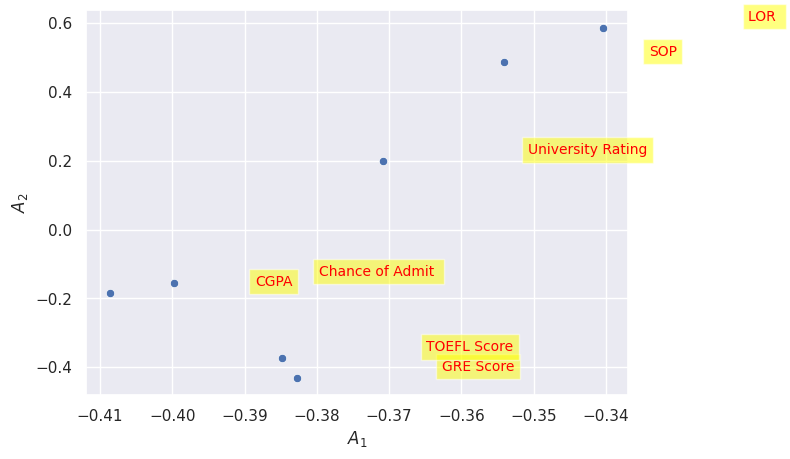

In [30]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Scree Plot

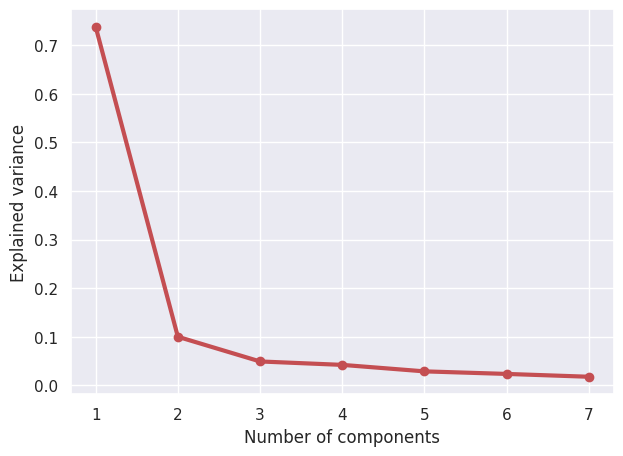

In [31]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Explained Variance Plot

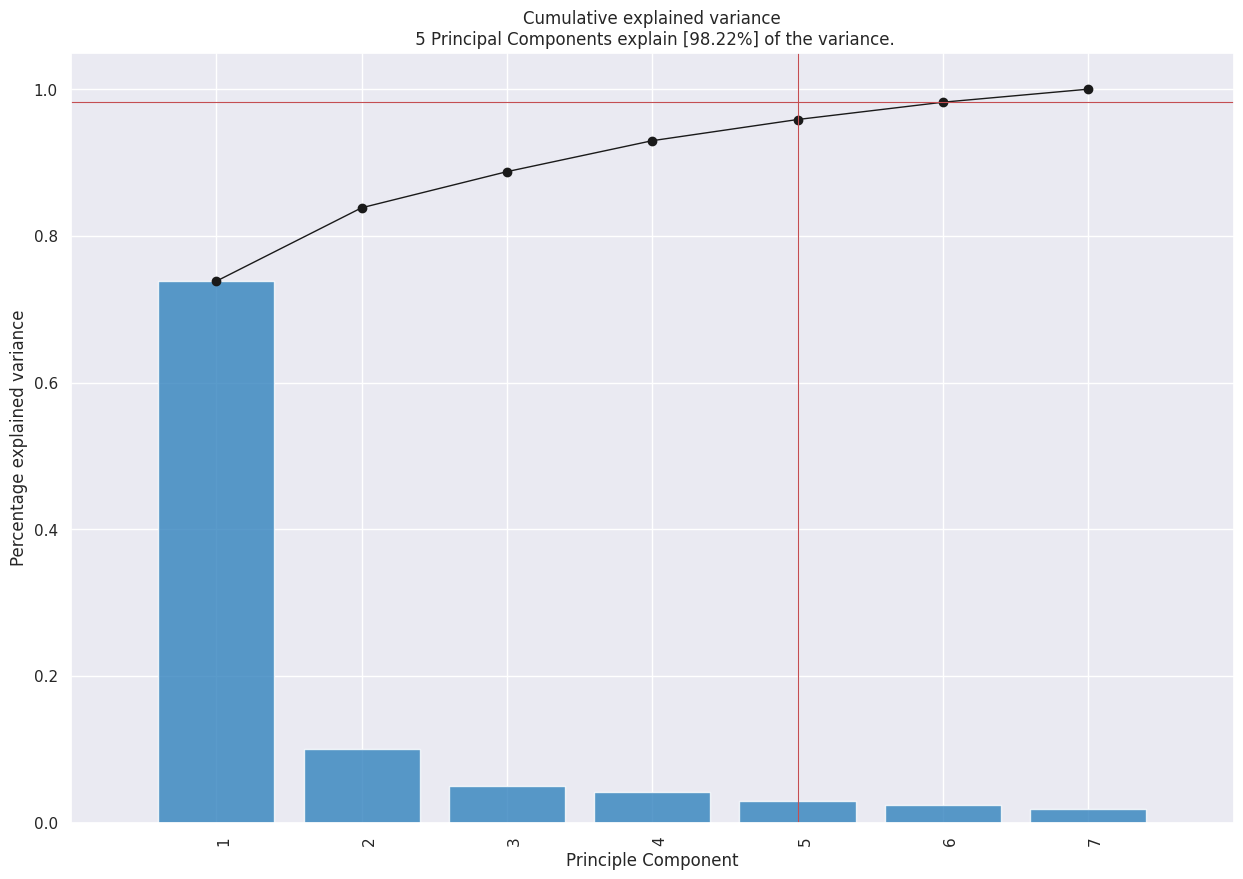

In [32]:
model.plot();

Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [98.22%] of the variance'}, xlabel='PC1 (73.8% expl.var)', ylabel='PC2 (10.0% expl.var)'>)

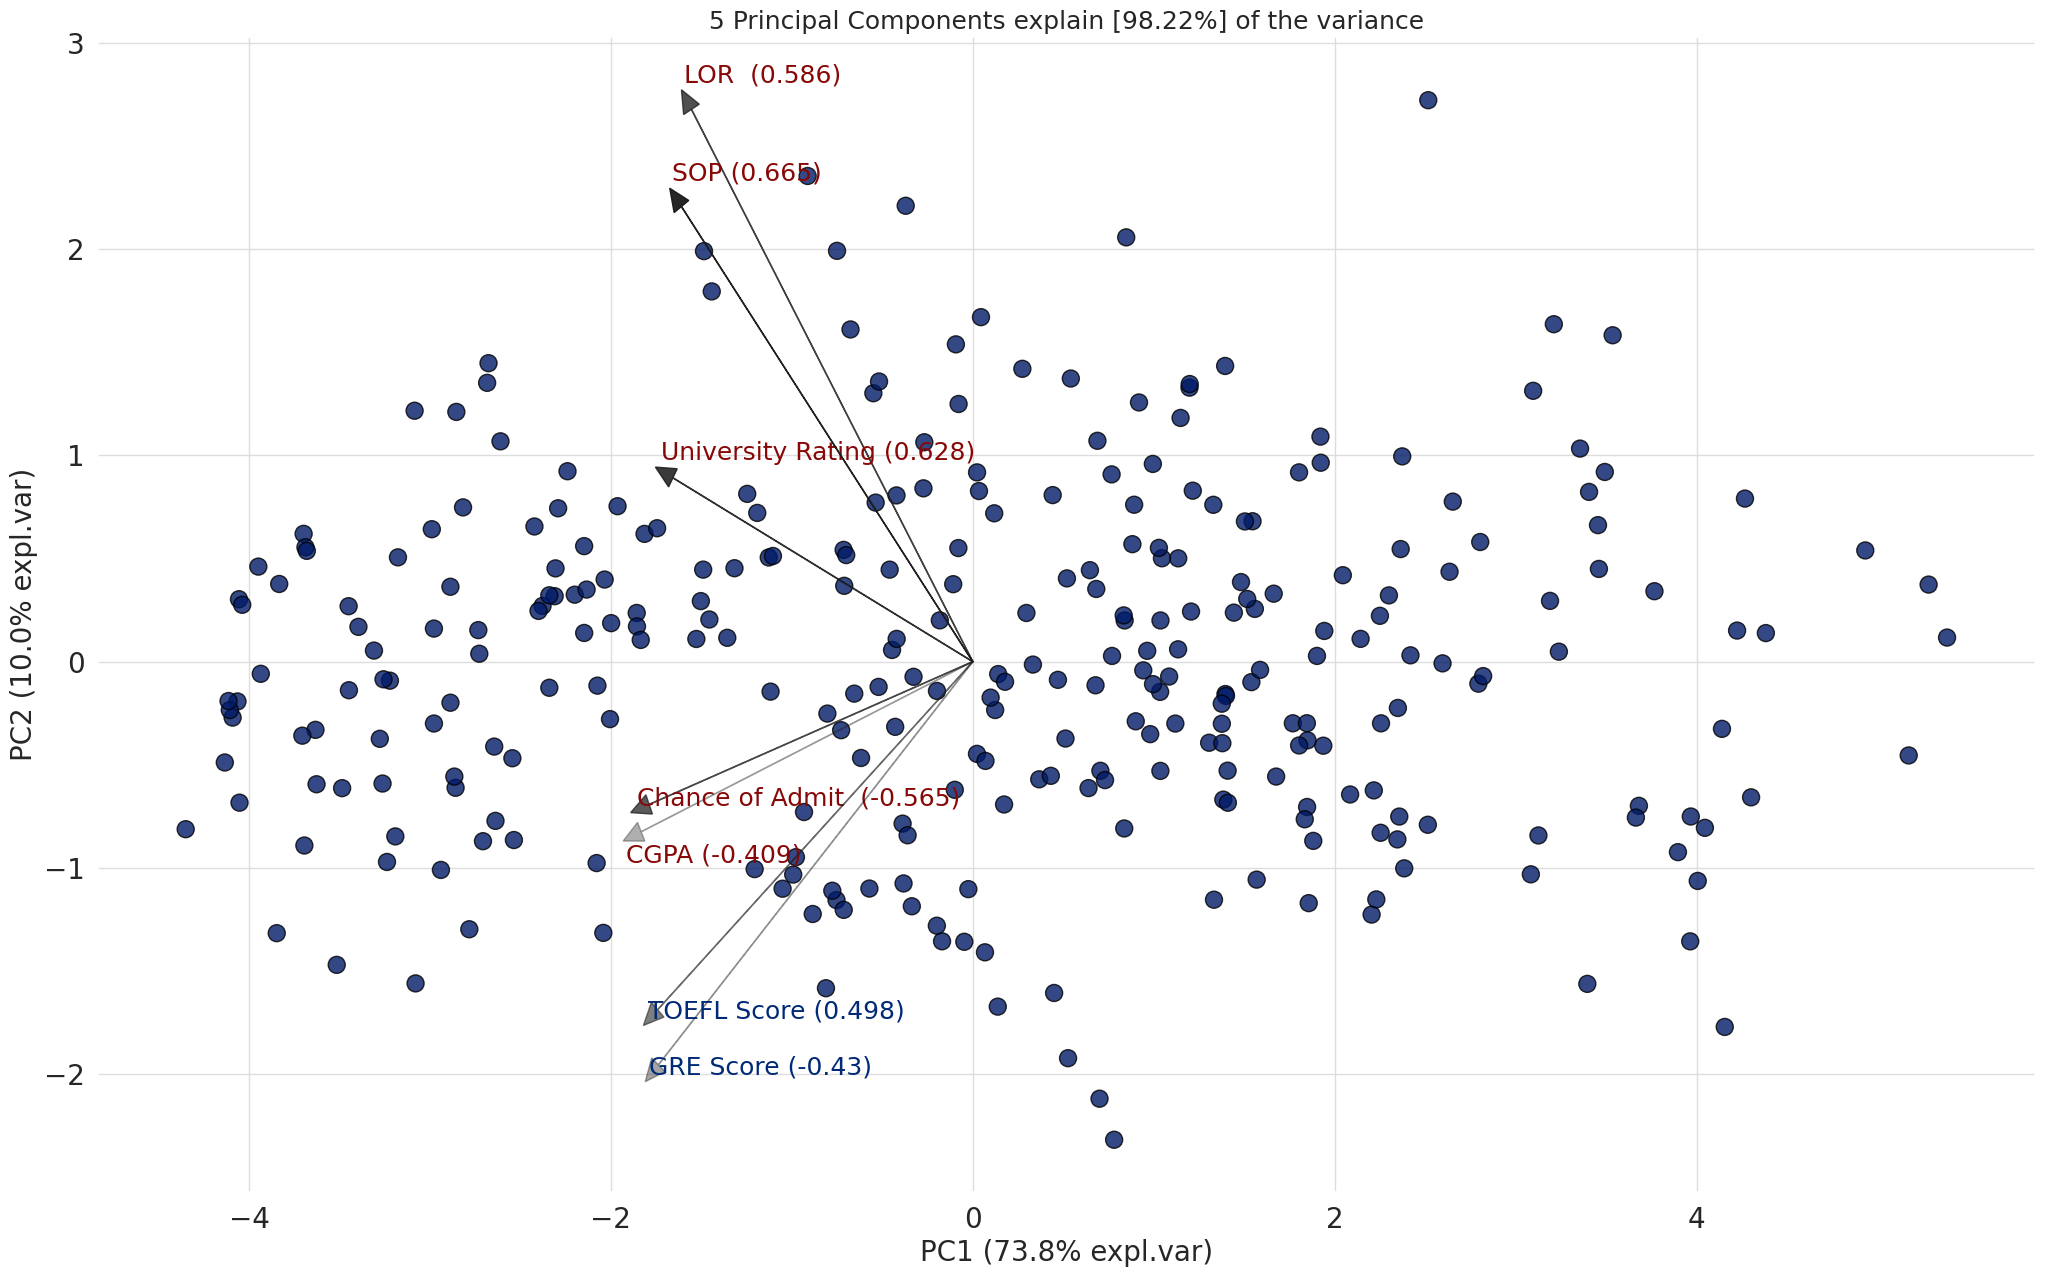

In [33]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '5 Principal Components explain [98.22%] of the variance'}, xlabel='PC1 (73.8% expl.var)', ylabel='PC2 (10.0% expl.var)', zlabel='PC3 (4.92% expl.var)'>)

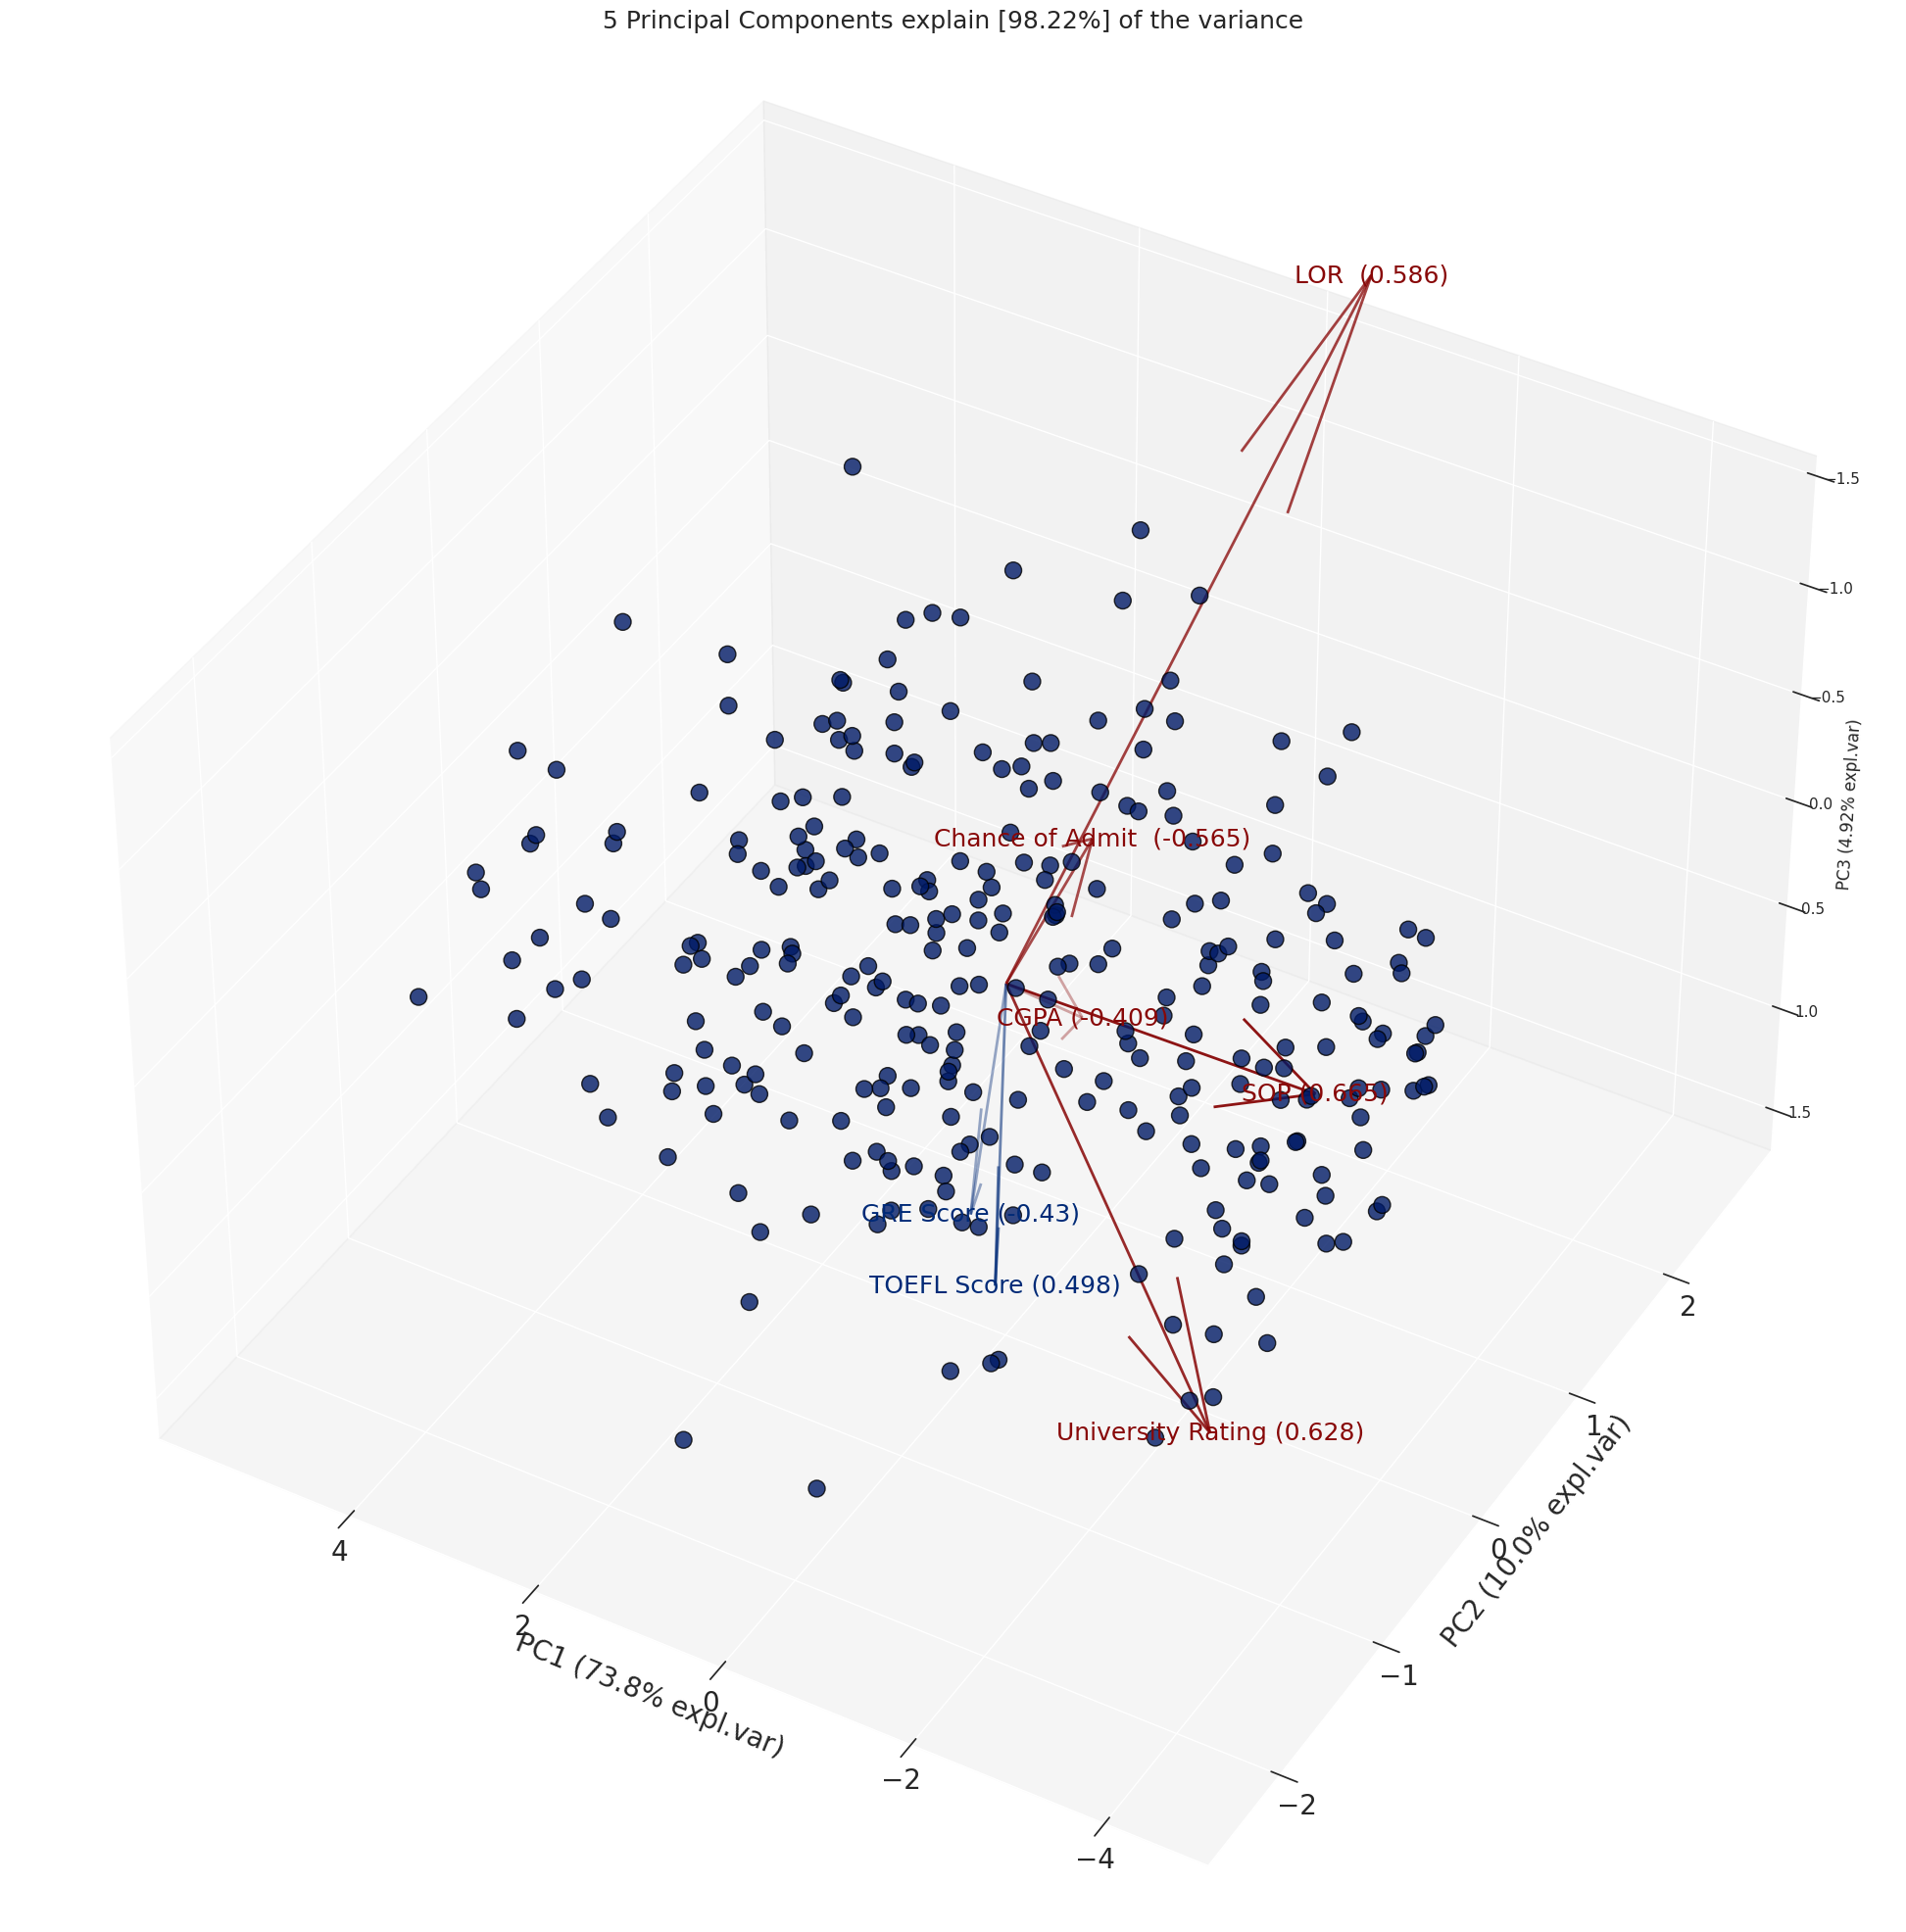

In [34]:
model.biplot3d(legend=False)

Classification using Pycaret

At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.
However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [35]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

In [36]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (269, 8)
Unseen Data For Predictions: (30, 8)


In [37]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

Comparing All Models

In [38]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [39]:
best_model

GaussianNB(priors=None, var_smoothing=1e-09)

Create a Model

Niave bayes Regresssion

In [40]:
nb = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune the model

In [41]:
tuned_nb=tune_model(nb)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [42]:
tuned_nb

GaussianNB(priors=None, var_smoothing=0.01)

Evaluate Niave bayes

In [43]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Create model with Ridge Classifier

In [44]:
ridge = create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune model with Ridge Classifier

In [45]:
tuned_ridge = tune_model(ridge)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [46]:
tuned_ridge

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

Evaluate model with Ridge Classifier

In [47]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Create model with Catboost Classifier

In [48]:
catboost=create_model('catboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune Catboost Classifier Model

In [49]:
tuned_catboost=tune_model(catboost)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Evaluate Catboost Classifier Model

In [50]:
tuned_catboost

In [51]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [52]:
!pip install statsmodels --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 38.8 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.0
    Uninstalling statsmodels-0.14.0:
      Successfully uninstalled statsmodels-0.14.0


Classification + PCA

In [53]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)


Comparing Models

In [54]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]


Best model with PCA

In [55]:
best_model_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

Tune Best Model

In [56]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Evaluate Best Model

In [66]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Create Linear Discriminant Analysis Model

In [58]:
lda_pca = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune Model

In [59]:
tuned_lda_pca = tune_model(lda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Evaluate Model

In [60]:
tuned_lda_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [61]:
evaluate_model(tuned_lda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Create Quadratic Discriminant Analysis Model

In [62]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune Model

In [63]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Evaluate Model

In [64]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [65]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Explainable AI with Shapley values

For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [ ]:
catboost_pca = create_model('catboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_catboost_pca = tune_model(catboost_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_catboost_pca

In [ ]:
evaluate_model(tuned_catboost_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
!pip install shap

In [ ]:
import shap

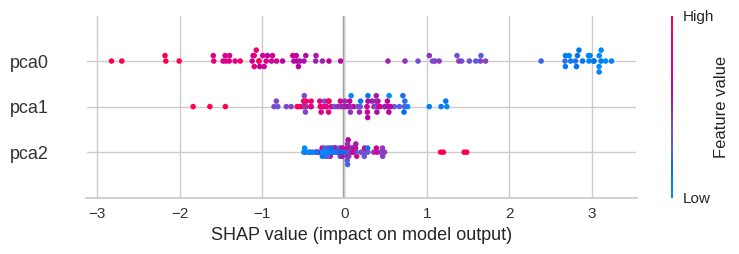

In [ ]:
interpret_model(tuned_catboost_pca, plot='summary')


In [ ]:
interpret_model(tuned_catboost_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_catboost_pca, plot='reason')